<a href="https://colab.research.google.com/github/sthanikan2000/Sem-07-AdvancedML/blob/main/Generative_Adversarial_Network_(GAN)_for_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Generative Adversarial Network (GAN) for MNIST


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import pickle

## Define the Generator and Discriminator Networks

In [ ]:
class Generator(nn.Module):
    def __init__(self, z_dim):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 28 * 28),
            nn.Tanh()
        )

    def forward(self, z):
        return self.net(z).view(-1, 1, 28, 28)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(28 * 28, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        return self.net(img_flat)


In [ ]:
# Hyperparameters
batch_size = 100
z_dim = 100
lr = 0.0002
epochs = 50
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data loading
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
mnist = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(mnist, batch_size=batch_size, shuffle=True)

# Instantiate models
G = Generator(z_dim).to(device)
D = Discriminator().to(device)

# Loss and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(G.parameters(), lr=lr)
optimizer_D = optim.Adam(D.parameters(), lr=lr)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 37035031.24it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1164833.49it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9294628.49it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7589852.10it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Initialize Models, Loss Function, and Optimizers

In [ ]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Hyperparameters
z_dim = 100  # Dimension of the latent vector
lr = 0.0002
batch_size = 100
num_epochs = 50

# Initialize models
generator = Generator(z_dim)
discriminator = Discriminator()

# Loss function
criterion = nn.BCELoss()

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

## Training Loop

* Train both the generator and discriminator alternately.



In [ ]:
for epoch in range(epochs):
    for i, (imgs, _) in enumerate(dataloader):

        # Real images
        real_imgs = imgs.to(device)
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Train Discriminator
        z = torch.randn(batch_size, z_dim).to(device)
        fake_imgs = G(z)

        real_loss = criterion(D(real_imgs), real_labels)
        fake_loss = criterion(D(fake_imgs.detach()), fake_labels)
        d_loss = real_loss + fake_loss

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        z = torch.randn(batch_size, z_dim).to(device)
        fake_imgs = G(z)
        g_loss = criterion(D(fake_imgs), real_labels)

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

        if i % 200 == 0:
            print(f"Epoch [{epoch}/{epochs}] Batch {i}/{len(dataloader)} \
                  Loss D: {d_loss.item()}, loss G: {g_loss.item()}")

print("Training complete.")


Epoch [0/50] Batch 0/600                   Loss D: 1.4060094356536865, loss G: 0.6894269585609436
Epoch [0/50] Batch 200/600                   Loss D: 0.1718243658542633, loss G: 2.499511957168579
Epoch [0/50] Batch 400/600                   Loss D: 1.2716724872589111, loss G: 5.010705947875977
Epoch [1/50] Batch 0/600                   Loss D: 0.01206112839281559, loss G: 13.199819564819336
Epoch [1/50] Batch 200/600                   Loss D: 0.5130834579467773, loss G: 5.063981533050537
Epoch [1/50] Batch 400/600                   Loss D: 1.858371615409851, loss G: 0.5782098174095154
Epoch [2/50] Batch 0/600                   Loss D: 0.9127938747406006, loss G: 1.6173591613769531
Epoch [2/50] Batch 200/600                   Loss D: 1.8568611145019531, loss G: 0.7108681201934814
Epoch [2/50] Batch 400/600                   Loss D: 0.8747258186340332, loss G: 1.9058071374893188
Epoch [3/50] Batch 0/600                   Loss D: 0.9826480746269226, loss G: 1.0799208879470825
Epoch [3/50

## Saving the Trained Models
* After training, save the generator and discriminator models.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# with open('G.pkl', 'wb') as f:
with open('/content/drive/MyDrive/Colab Notebooks/Semester_07/Advanced ML/G.pkl', 'wb') as f:
    pickle.dump(G, f)

# with open('D.pkl', 'wb') as f:
with open('/content/drive/MyDrive/Colab Notebooks/Semester_07/Advanced ML/D.pkl', 'wb') as f:
    pickle.dump(D, f)

# 2 Create and annotate a fake data set

In [ ]:
import os
import numpy as np
from torchvision.utils import save_image
import matplotlib.pyplot as plt

In [ ]:
# Directory to save the images and latent vectors
output_dir = 'Fake_Digits'
os.makedirs(output_dir, exist_ok=True)

z_dim = 100  # Dimensionality of the latent vector
max_images = 100  # Maximum number of images to generate
generated_count = 0  # Counter for saved images

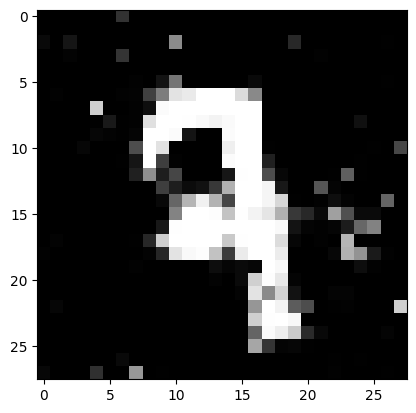

Is this digit identifiable? (n/digit): n
Image discarded.


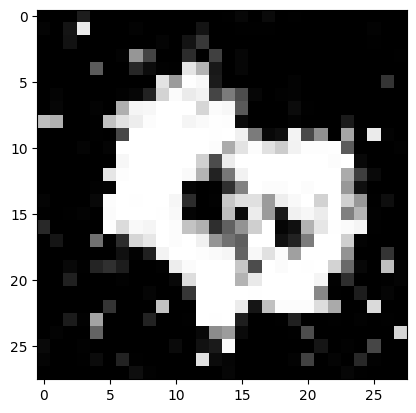

Is this digit identifiable? (n/digit): n
Image discarded.


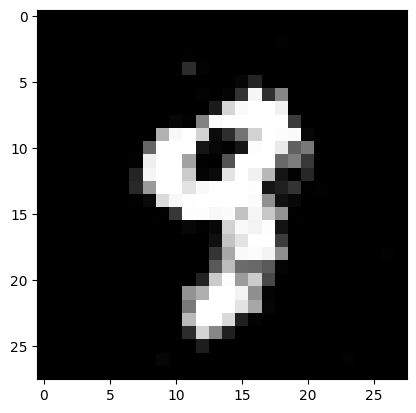

Is this digit identifiable? (n/digit): n
Image discarded.


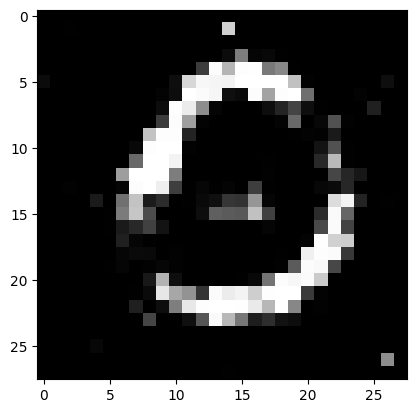

Is this digit identifiable? (n/digit): n
Image discarded.


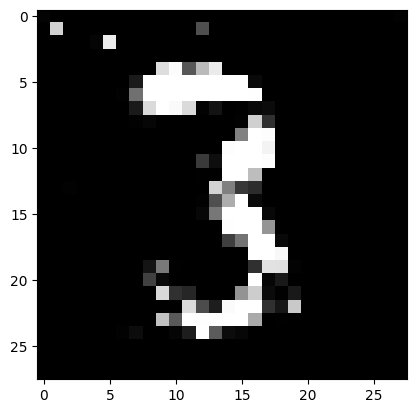

Is this digit identifiable? (n/digit): 3
Saved image and latent vector as Fake_Digits/3/060.png and Fake_Digits/3/060.txt.


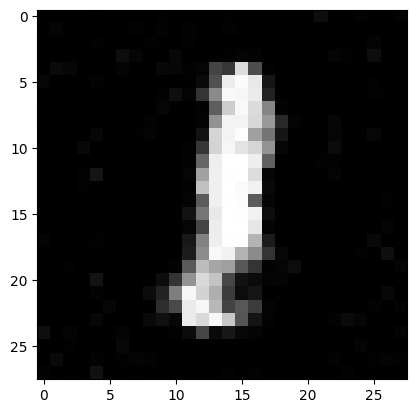

Is this digit identifiable? (n/digit): 1
Saved image and latent vector as Fake_Digits/1/061.png and Fake_Digits/1/061.txt.


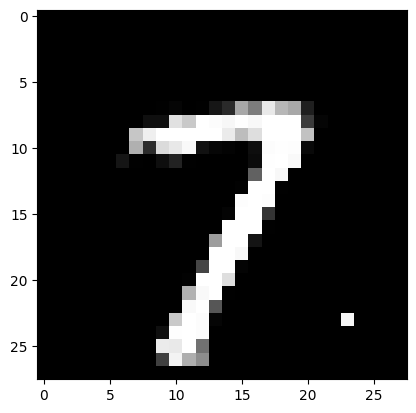

Is this digit identifiable? (n/digit): 7
Saved image and latent vector as Fake_Digits/7/062.png and Fake_Digits/7/062.txt.


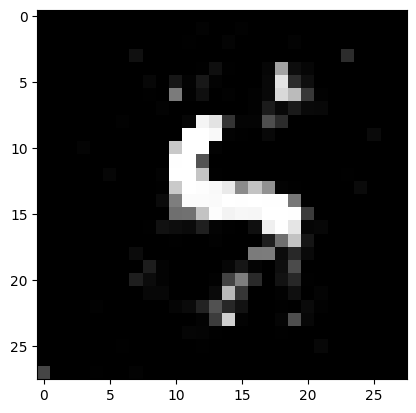

Is this digit identifiable? (n/digit): n
Image discarded.


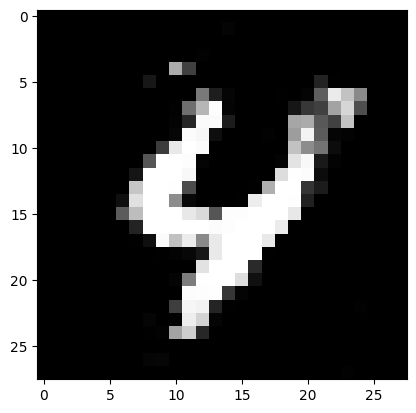

Is this digit identifiable? (n/digit): 4
Saved image and latent vector as Fake_Digits/4/063.png and Fake_Digits/4/063.txt.


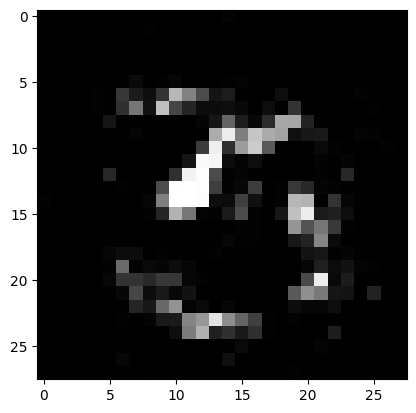

Is this digit identifiable? (n/digit): n
Image discarded.


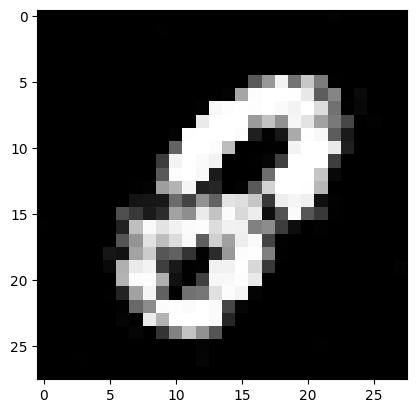

Is this digit identifiable? (n/digit): n
Image discarded.


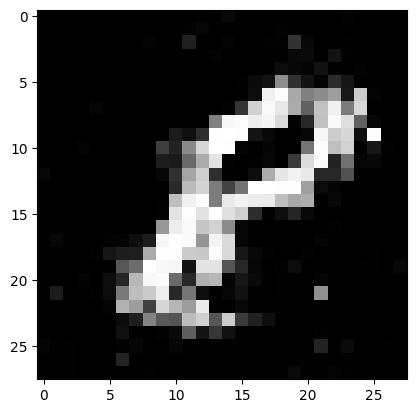

Is this digit identifiable? (n/digit): n
Image discarded.


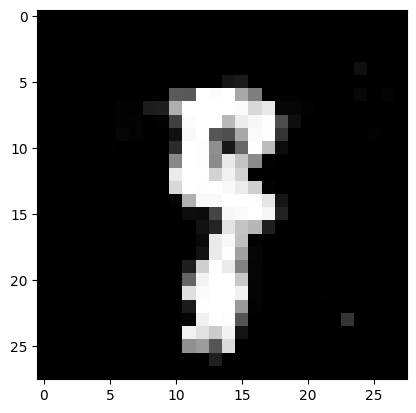

Is this digit identifiable? (n/digit): n
Image discarded.


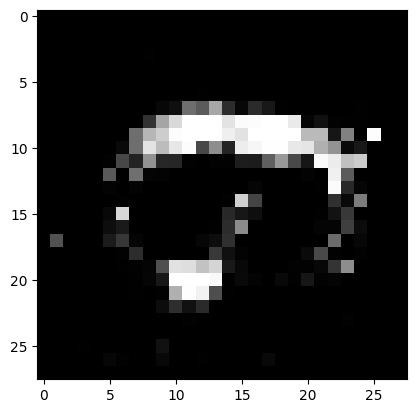

Is this digit identifiable? (n/digit): n
Image discarded.


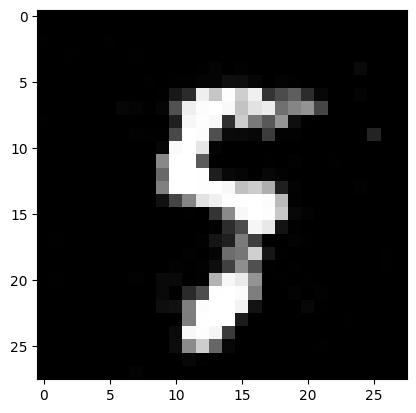

Is this digit identifiable? (n/digit): 5
Saved image and latent vector as Fake_Digits/5/064.png and Fake_Digits/5/064.txt.


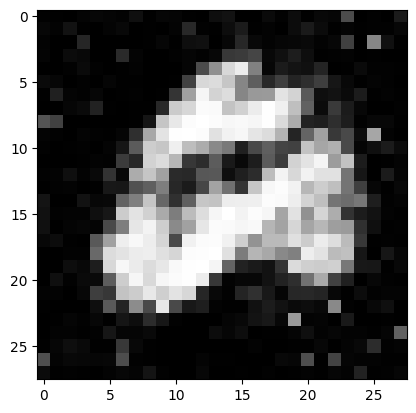

Is this digit identifiable? (n/digit): n
Image discarded.


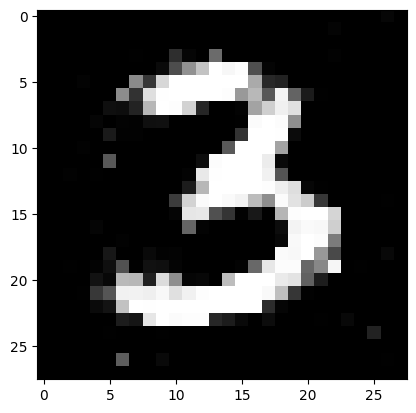

Is this digit identifiable? (n/digit): 3
Saved image and latent vector as Fake_Digits/3/065.png and Fake_Digits/3/065.txt.


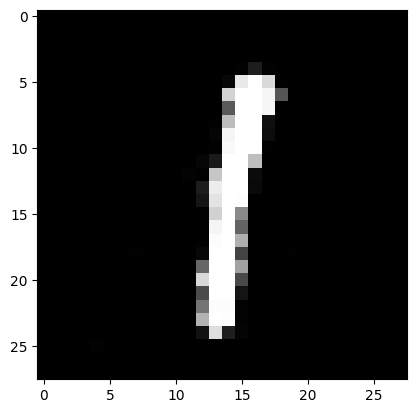

Is this digit identifiable? (n/digit): 1
Saved image and latent vector as Fake_Digits/1/066.png and Fake_Digits/1/066.txt.


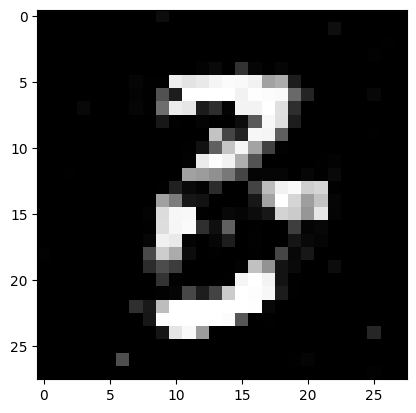

Is this digit identifiable? (n/digit): n
Image discarded.


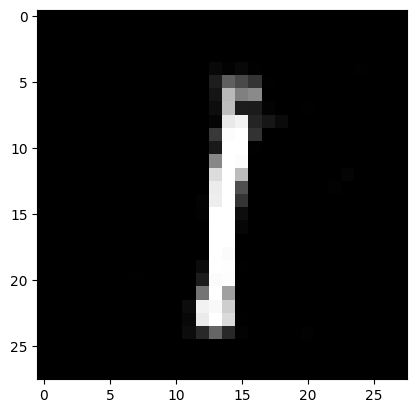

Is this digit identifiable? (n/digit): 1
Saved image and latent vector as Fake_Digits/1/067.png and Fake_Digits/1/067.txt.


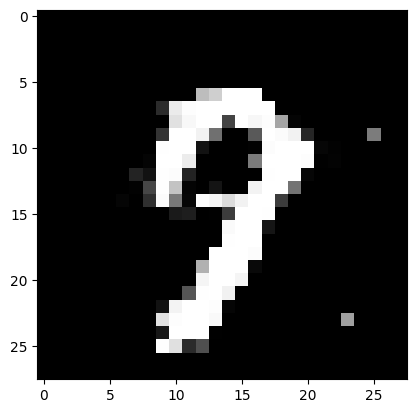

Is this digit identifiable? (n/digit): 9
Saved image and latent vector as Fake_Digits/9/068.png and Fake_Digits/9/068.txt.


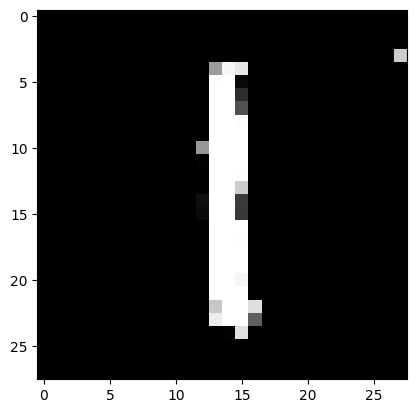

Is this digit identifiable? (n/digit): 1
Saved image and latent vector as Fake_Digits/1/069.png and Fake_Digits/1/069.txt.


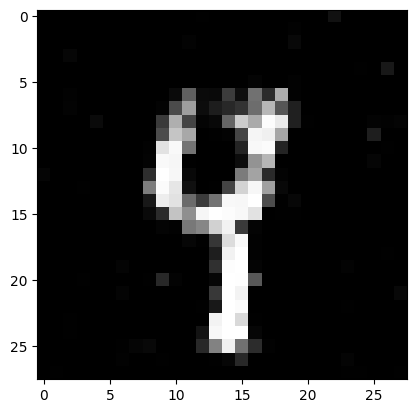

Is this digit identifiable? (n/digit): n
Image discarded.


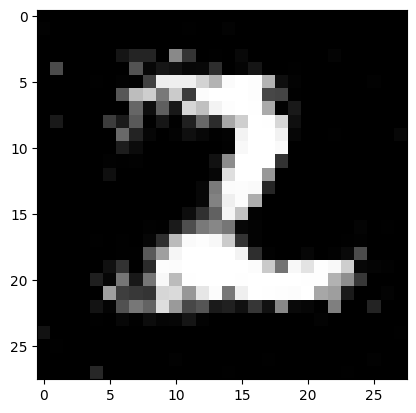

Is this digit identifiable? (n/digit): 2
Saved image and latent vector as Fake_Digits/2/070.png and Fake_Digits/2/070.txt.


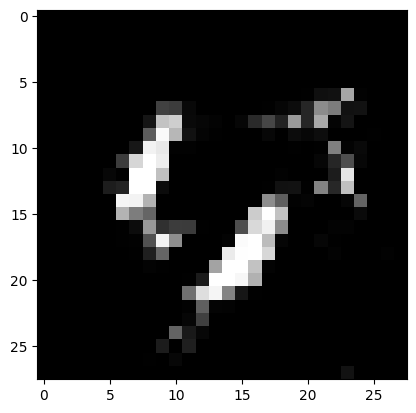

Is this digit identifiable? (n/digit): n
Image discarded.


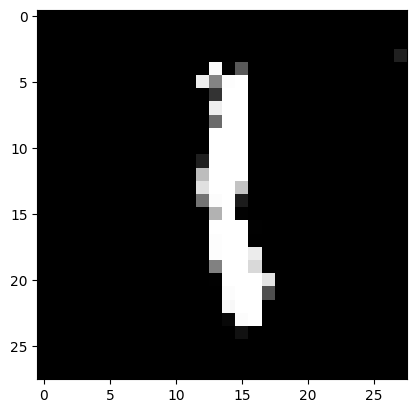

Is this digit identifiable? (n/digit): n
Image discarded.


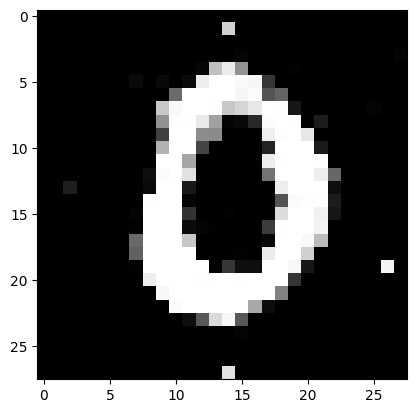

Is this digit identifiable? (n/digit): 0
Saved image and latent vector as Fake_Digits/0/071.png and Fake_Digits/0/071.txt.


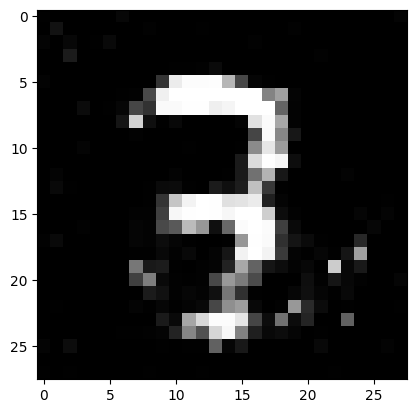

Is this digit identifiable? (n/digit): n
Image discarded.


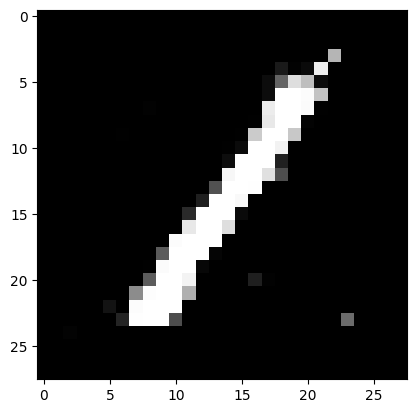

Is this digit identifiable? (n/digit): n
Image discarded.


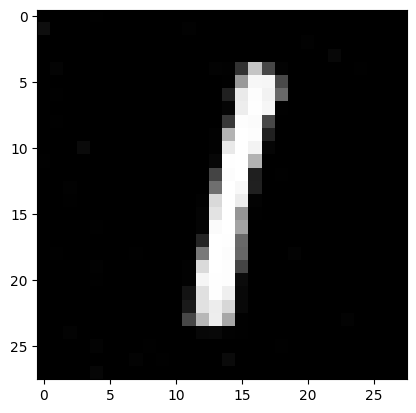

Is this digit identifiable? (n/digit): 1
Saved image and latent vector as Fake_Digits/1/072.png and Fake_Digits/1/072.txt.


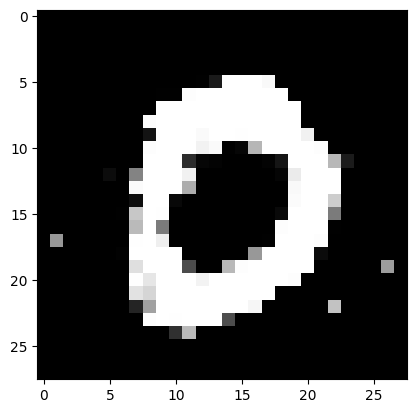

Is this digit identifiable? (n/digit): 0
Saved image and latent vector as Fake_Digits/0/073.png and Fake_Digits/0/073.txt.


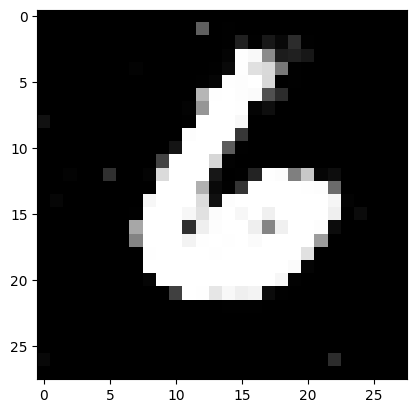

Is this digit identifiable? (n/digit): 6
Saved image and latent vector as Fake_Digits/6/074.png and Fake_Digits/6/074.txt.


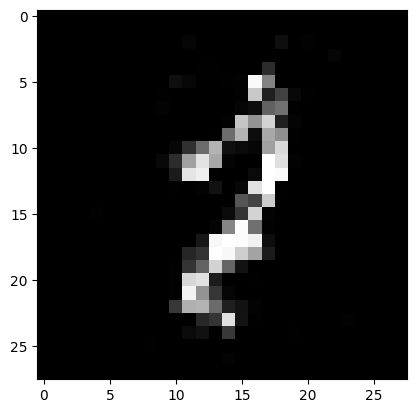

Is this digit identifiable? (n/digit): n
Image discarded.


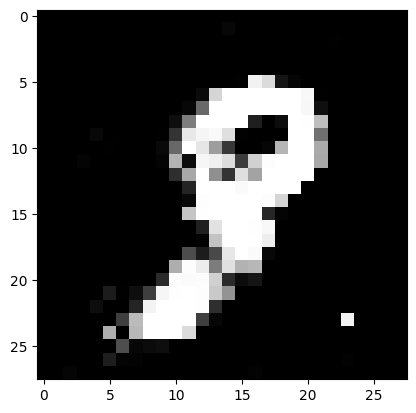

Is this digit identifiable? (n/digit): n
Image discarded.


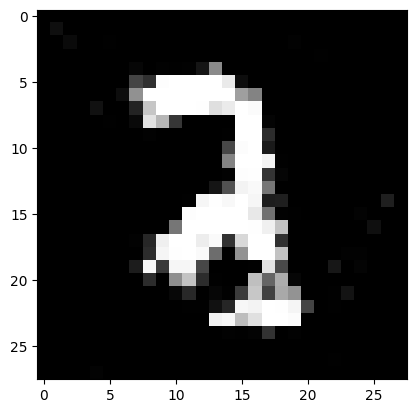

Is this digit identifiable? (n/digit): n
Image discarded.


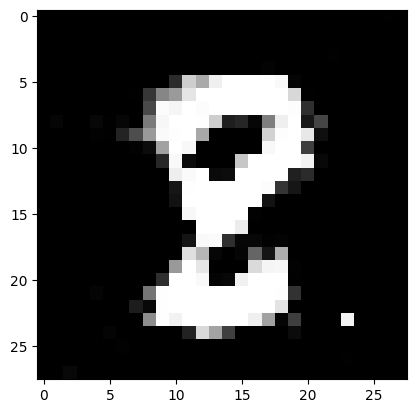

Is this digit identifiable? (n/digit): n
Image discarded.


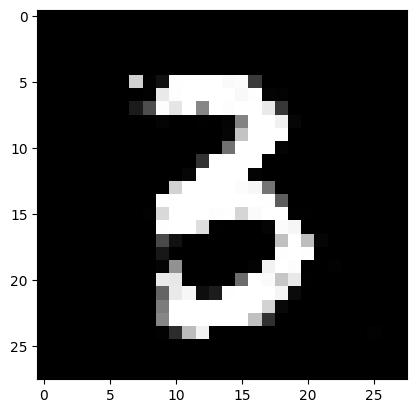

Is this digit identifiable? (n/digit): 3
Saved image and latent vector as Fake_Digits/3/075.png and Fake_Digits/3/075.txt.


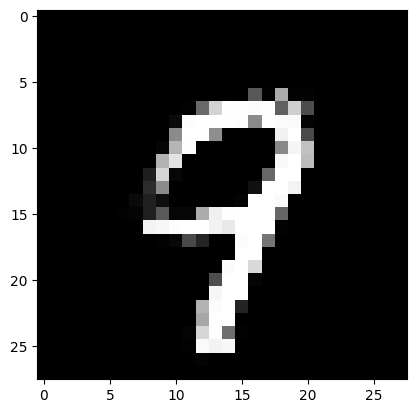

Is this digit identifiable? (n/digit): 9
Saved image and latent vector as Fake_Digits/9/076.png and Fake_Digits/9/076.txt.


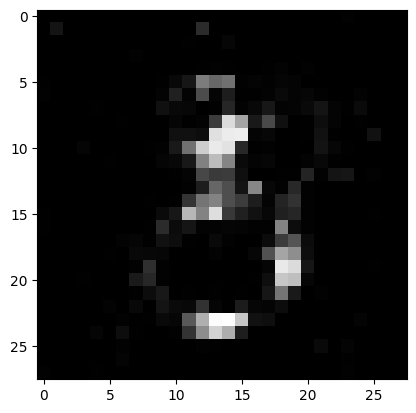

Is this digit identifiable? (n/digit): n
Image discarded.


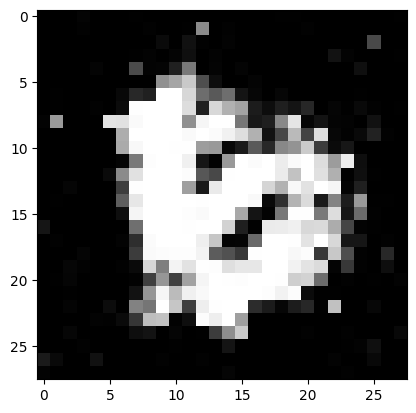

Is this digit identifiable? (n/digit): n
Image discarded.


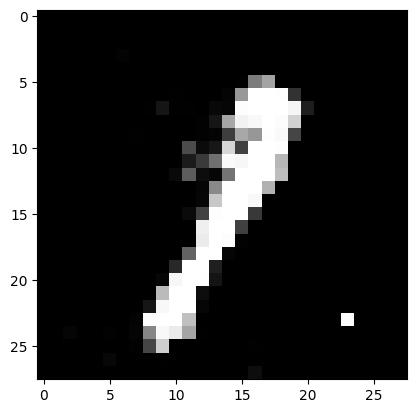

Is this digit identifiable? (n/digit): n
Image discarded.


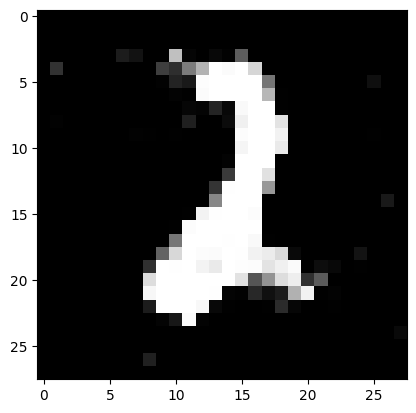

Is this digit identifiable? (n/digit): 2
Saved image and latent vector as Fake_Digits/2/077.png and Fake_Digits/2/077.txt.


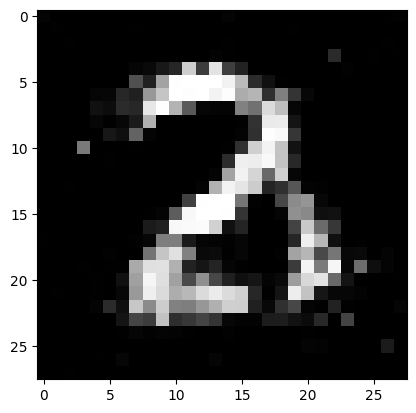

Is this digit identifiable? (n/digit): n
Image discarded.


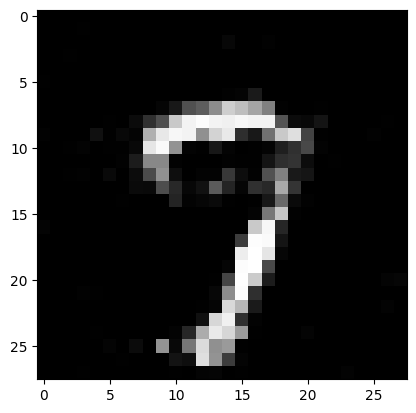

Is this digit identifiable? (n/digit): n
Image discarded.


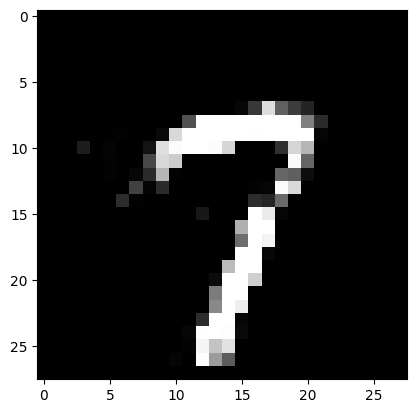

Is this digit identifiable? (n/digit): n
Image discarded.


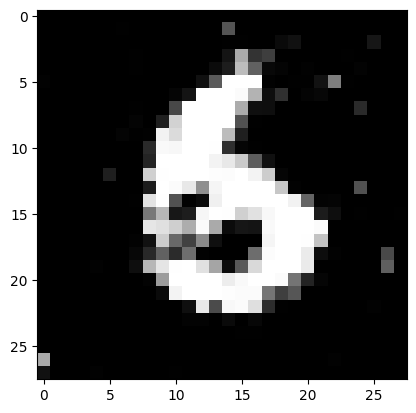

Is this digit identifiable? (n/digit): n
Image discarded.


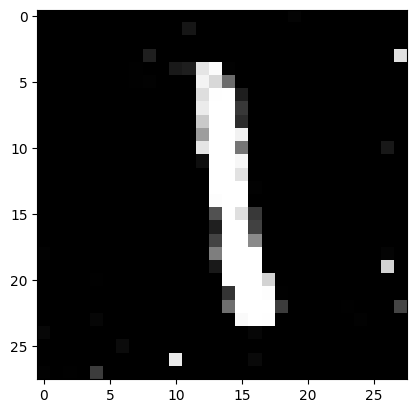

Is this digit identifiable? (n/digit): n
Image discarded.


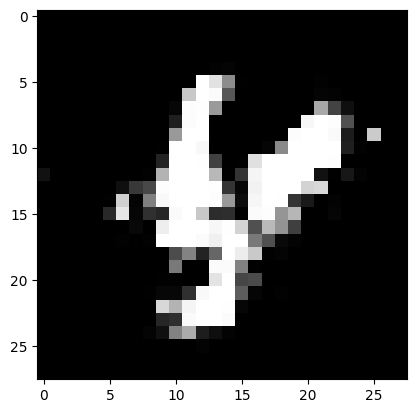

Is this digit identifiable? (n/digit): n
Image discarded.


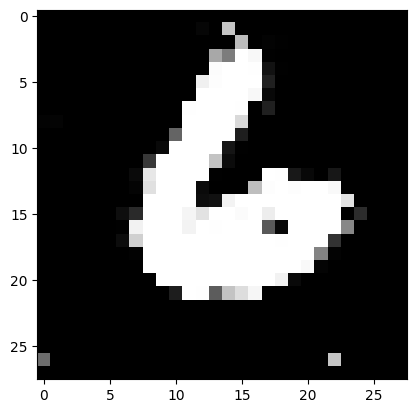

Is this digit identifiable? (n/digit): 6
Saved image and latent vector as Fake_Digits/6/078.png and Fake_Digits/6/078.txt.


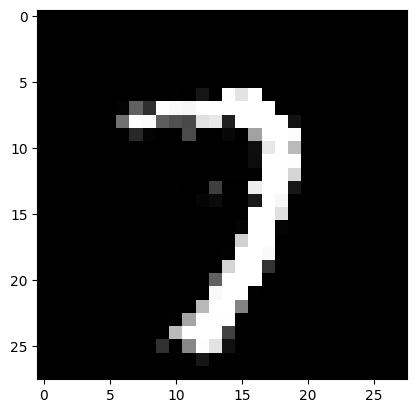

Is this digit identifiable? (n/digit): n
Image discarded.


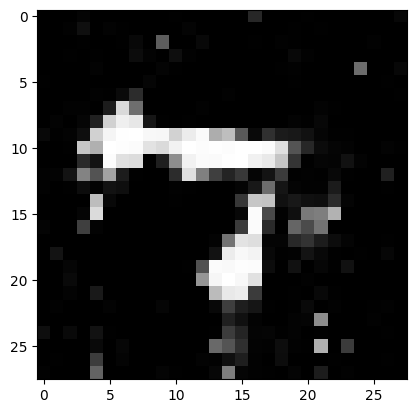

Is this digit identifiable? (n/digit): n
Image discarded.


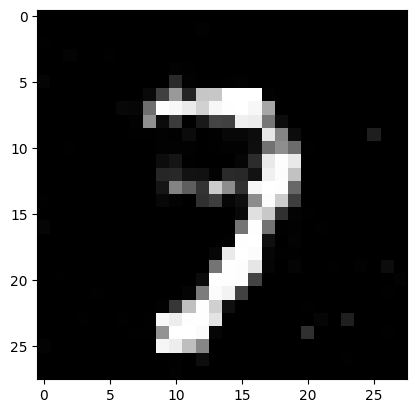

Is this digit identifiable? (n/digit): n
Image discarded.


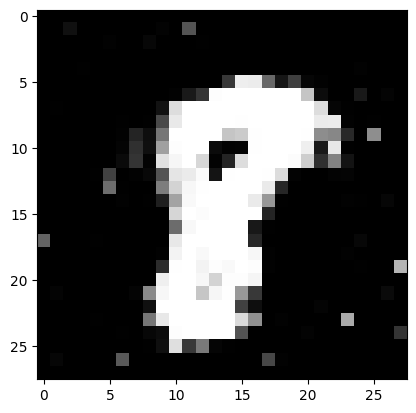

Is this digit identifiable? (n/digit): 8
Saved image and latent vector as Fake_Digits/8/079.png and Fake_Digits/8/079.txt.


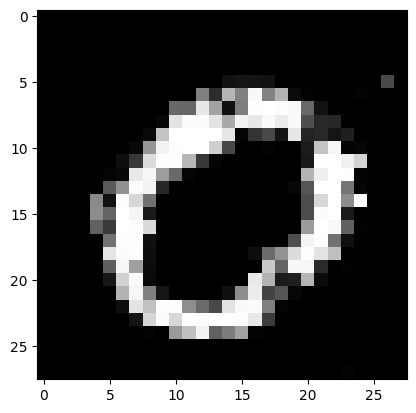

Is this digit identifiable? (n/digit): 0
Saved image and latent vector as Fake_Digits/0/080.png and Fake_Digits/0/080.txt.


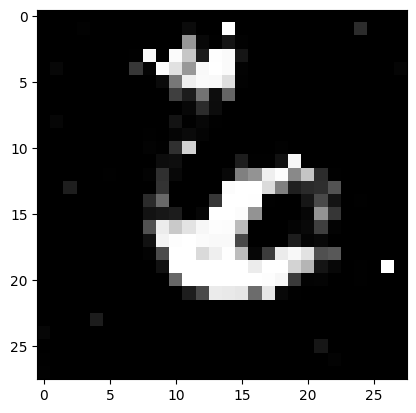

Is this digit identifiable? (n/digit): n
Image discarded.


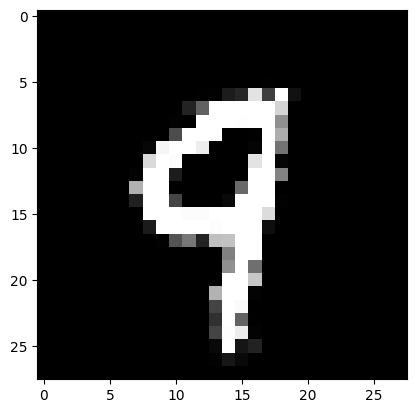

Is this digit identifiable? (n/digit): 9
Saved image and latent vector as Fake_Digits/9/081.png and Fake_Digits/9/081.txt.


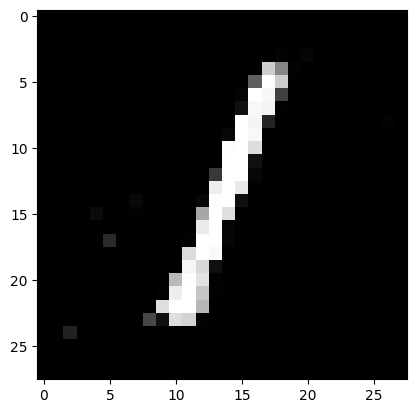

Is this digit identifiable? (n/digit): n
Image discarded.


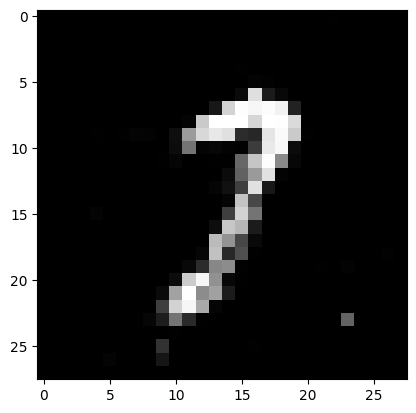

Is this digit identifiable? (n/digit): n
Image discarded.


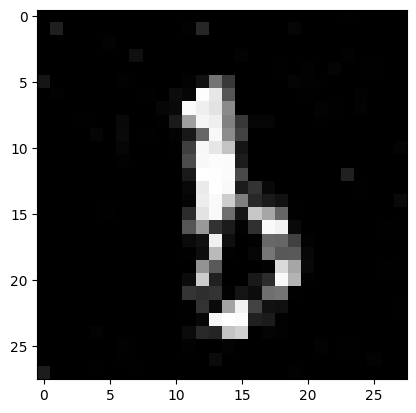

Is this digit identifiable? (n/digit): n
Image discarded.


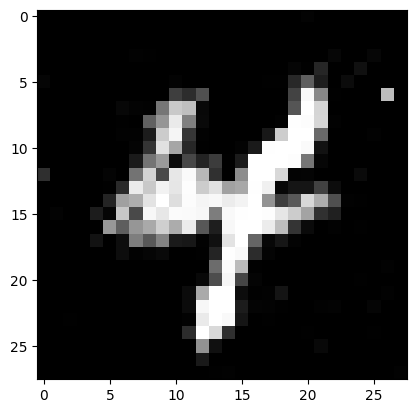

Is this digit identifiable? (n/digit): n
Image discarded.


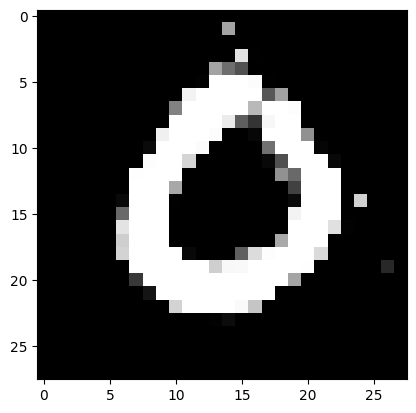

Is this digit identifiable? (n/digit): 0
Saved image and latent vector as Fake_Digits/0/082.png and Fake_Digits/0/082.txt.


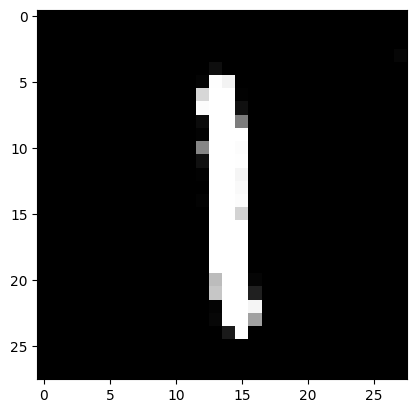

Is this digit identifiable? (n/digit): 1
Saved image and latent vector as Fake_Digits/1/083.png and Fake_Digits/1/083.txt.


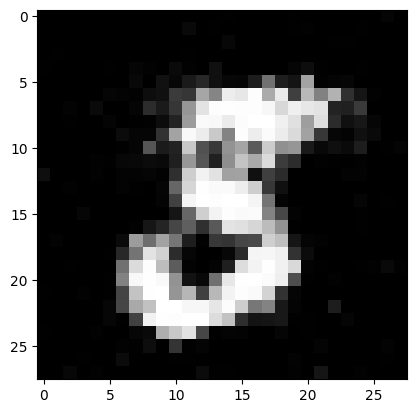

Is this digit identifiable? (n/digit): 8
Saved image and latent vector as Fake_Digits/8/084.png and Fake_Digits/8/084.txt.


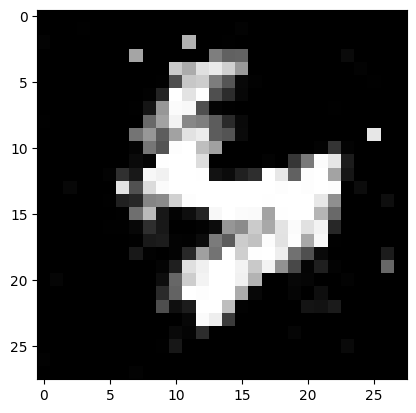

Is this digit identifiable? (n/digit): n
Image discarded.


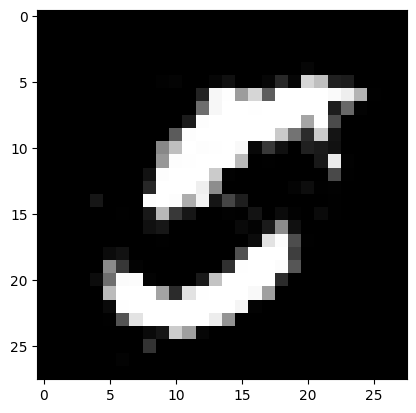

Is this digit identifiable? (n/digit): 5
Saved image and latent vector as Fake_Digits/5/085.png and Fake_Digits/5/085.txt.


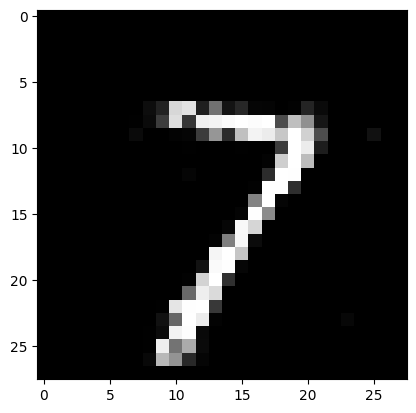

Is this digit identifiable? (n/digit): n
Image discarded.


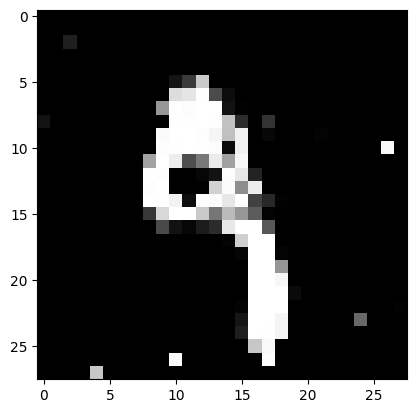

Is this digit identifiable? (n/digit): n
Image discarded.


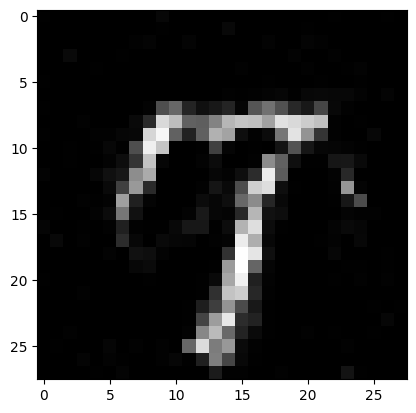

Is this digit identifiable? (n/digit): n
Image discarded.


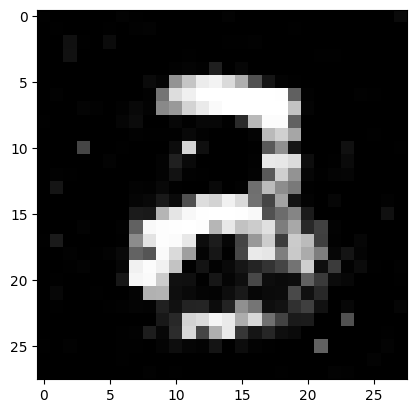

Is this digit identifiable? (n/digit): n
Image discarded.


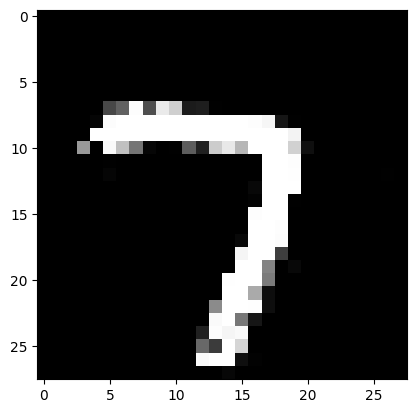

Is this digit identifiable? (n/digit): 7
Saved image and latent vector as Fake_Digits/7/086.png and Fake_Digits/7/086.txt.


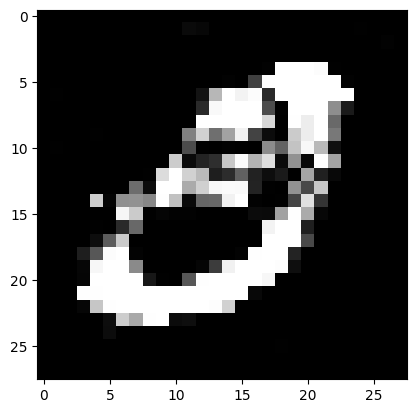

Is this digit identifiable? (n/digit): n
Image discarded.


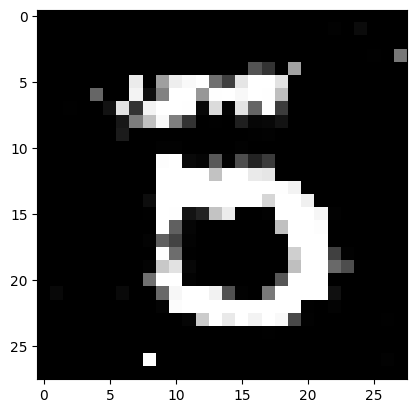

Is this digit identifiable? (n/digit): n
Image discarded.


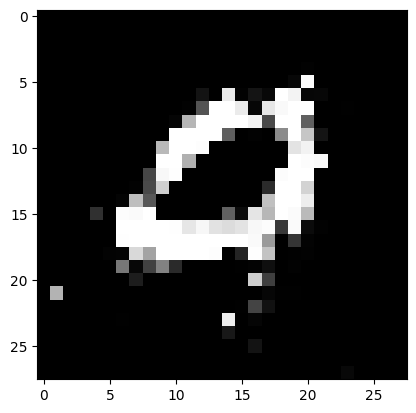

Is this digit identifiable? (n/digit): n
Image discarded.


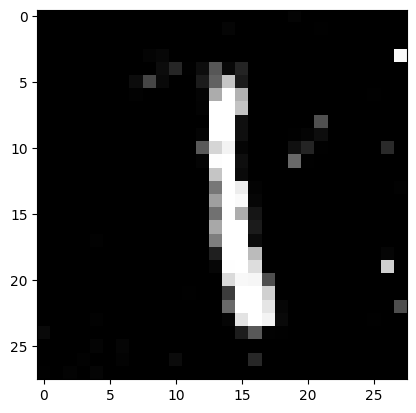

Is this digit identifiable? (n/digit): 1
Saved image and latent vector as Fake_Digits/1/087.png and Fake_Digits/1/087.txt.


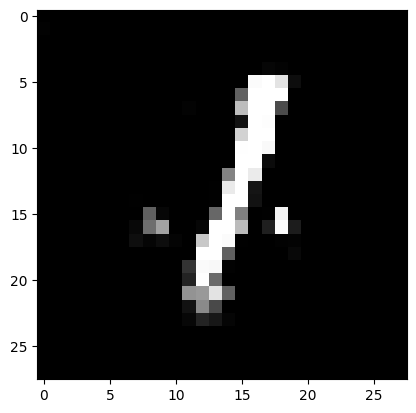

Is this digit identifiable? (n/digit): n
Image discarded.


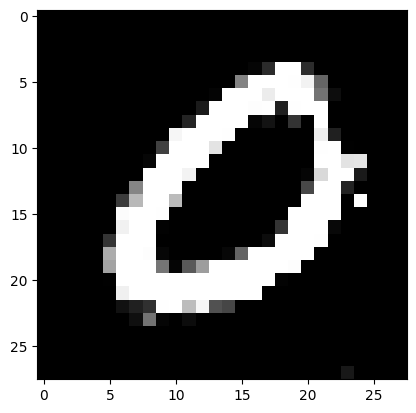

Is this digit identifiable? (n/digit): 0
Saved image and latent vector as Fake_Digits/0/088.png and Fake_Digits/0/088.txt.


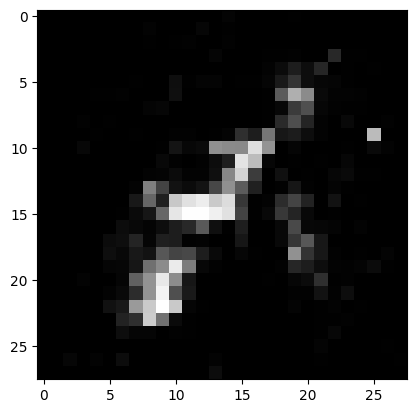

Is this digit identifiable? (n/digit): n
Image discarded.


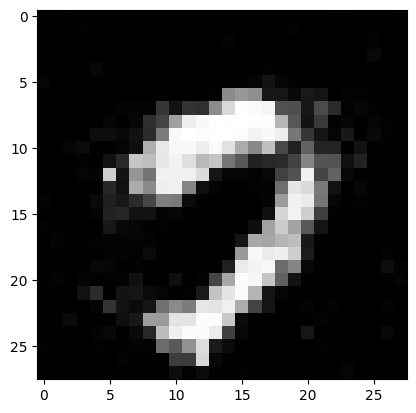

Is this digit identifiable? (n/digit): n
Image discarded.


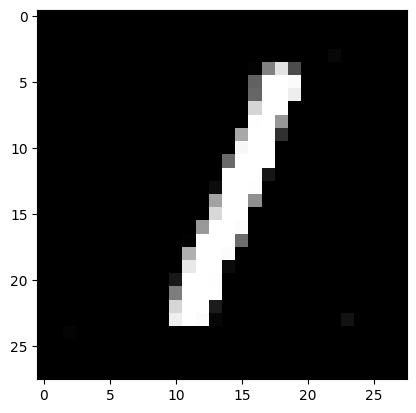

Is this digit identifiable? (n/digit): n
Image discarded.


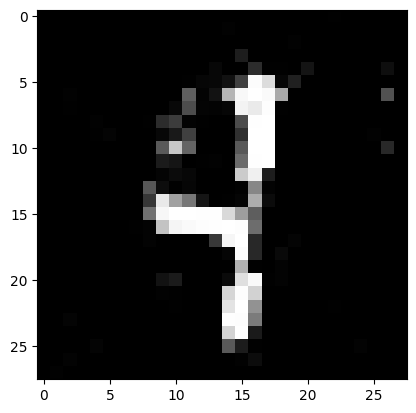

Is this digit identifiable? (n/digit): n
Image discarded.


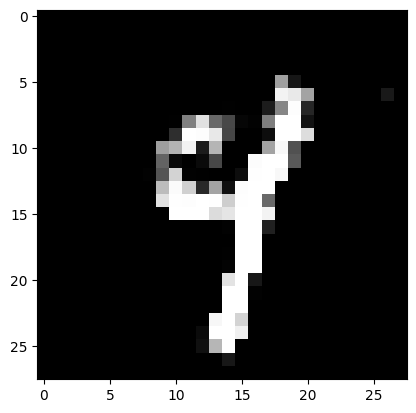

Is this digit identifiable? (n/digit): n
Image discarded.


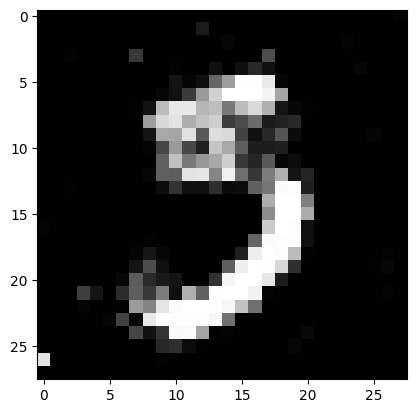

Is this digit identifiable? (n/digit): n
Image discarded.


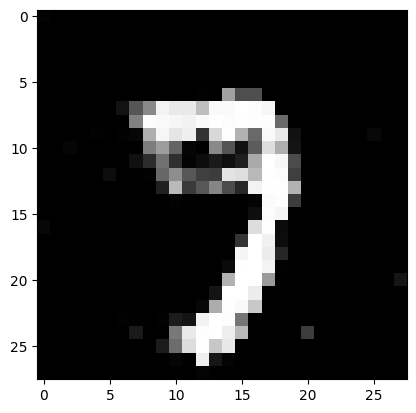

Is this digit identifiable? (n/digit): n
Image discarded.


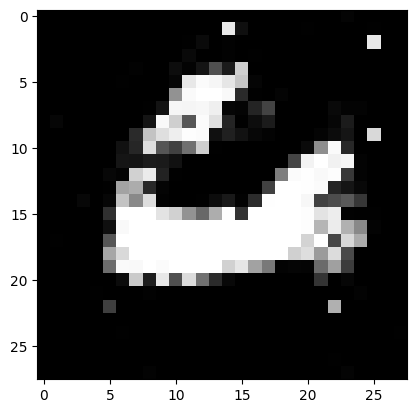

Is this digit identifiable? (n/digit): n
Image discarded.


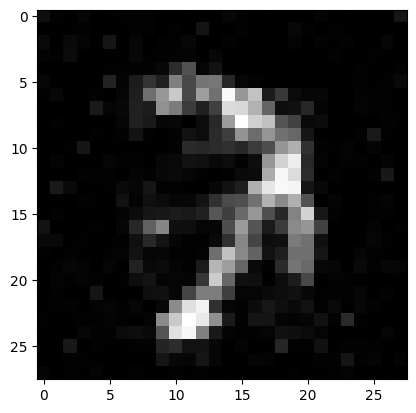

Is this digit identifiable? (n/digit): n
Image discarded.


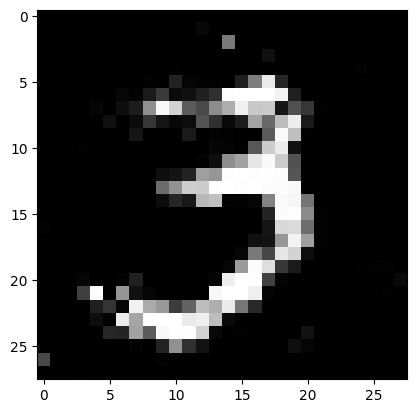

Is this digit identifiable? (n/digit): 3
Saved image and latent vector as Fake_Digits/3/089.png and Fake_Digits/3/089.txt.


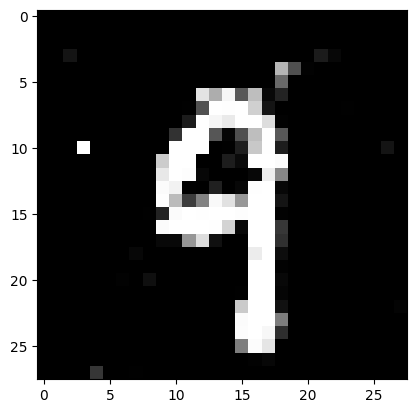

Is this digit identifiable? (n/digit): 9
Saved image and latent vector as Fake_Digits/9/090.png and Fake_Digits/9/090.txt.


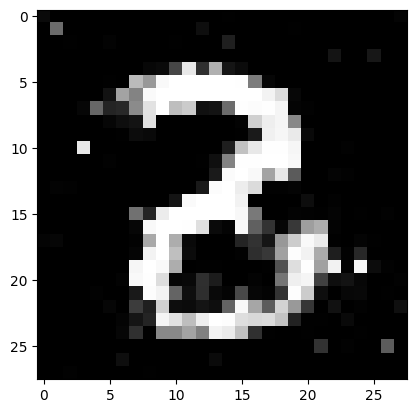

Is this digit identifiable? (n/digit): n
Image discarded.


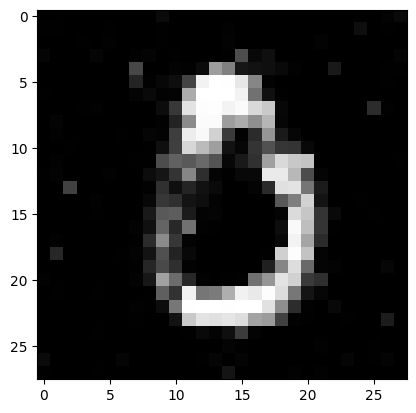

Is this digit identifiable? (n/digit): n
Image discarded.


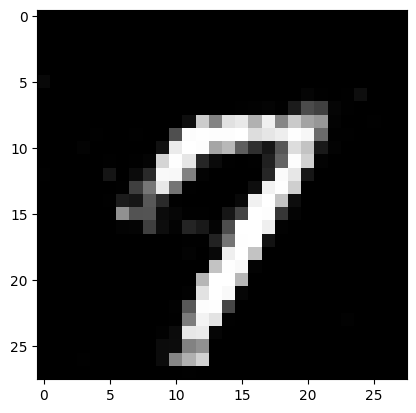

Is this digit identifiable? (n/digit): n
Image discarded.


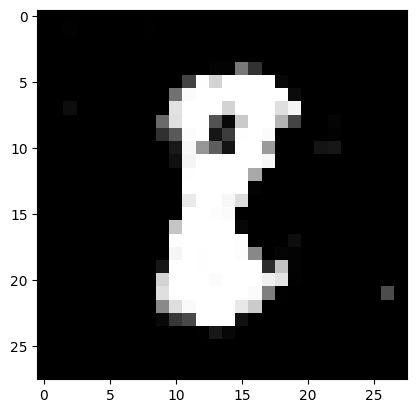

Is this digit identifiable? (n/digit): n
Image discarded.


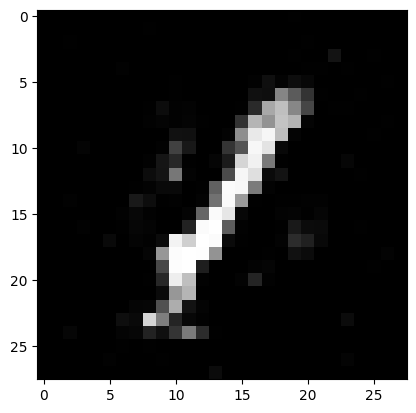

Is this digit identifiable? (n/digit): n
Image discarded.


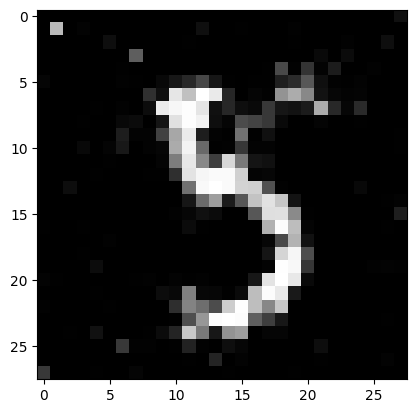

Is this digit identifiable? (n/digit): 5
Saved image and latent vector as Fake_Digits/5/091.png and Fake_Digits/5/091.txt.


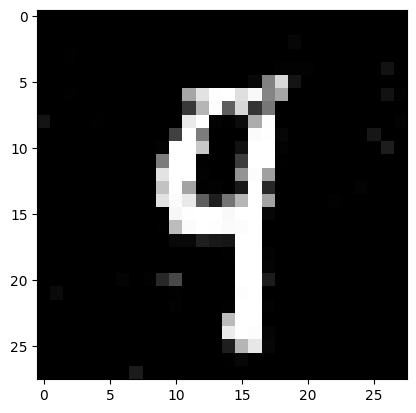

Is this digit identifiable? (n/digit): 9
Saved image and latent vector as Fake_Digits/9/092.png and Fake_Digits/9/092.txt.


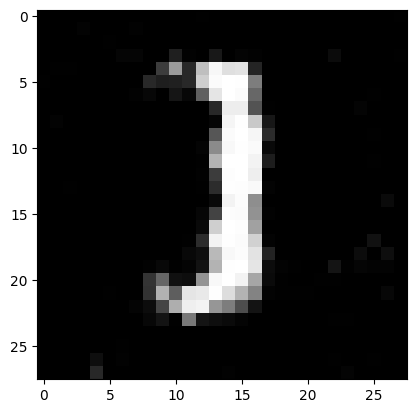

Is this digit identifiable? (n/digit): n
Image discarded.


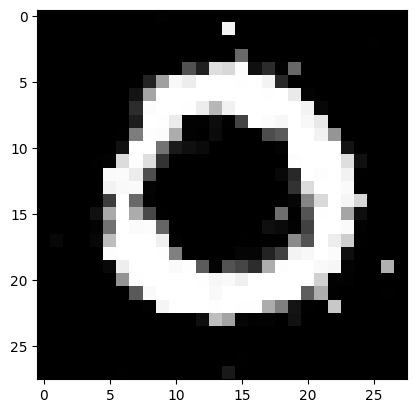

Is this digit identifiable? (n/digit): 0
Saved image and latent vector as Fake_Digits/0/093.png and Fake_Digits/0/093.txt.


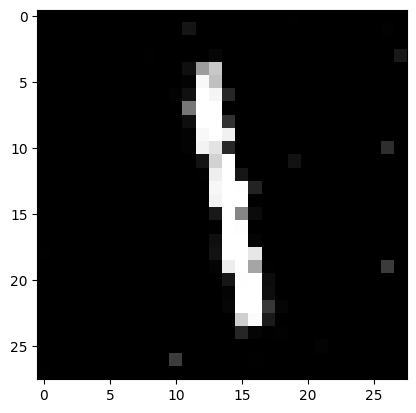

Is this digit identifiable? (n/digit): 1
Saved image and latent vector as Fake_Digits/1/094.png and Fake_Digits/1/094.txt.


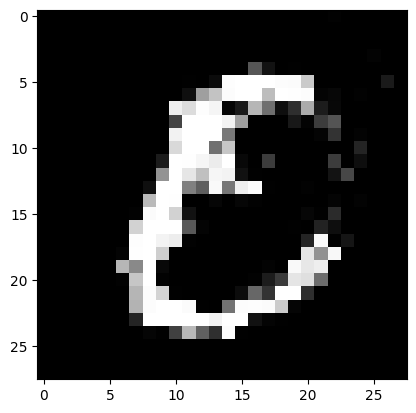

Is this digit identifiable? (n/digit): n
Image discarded.


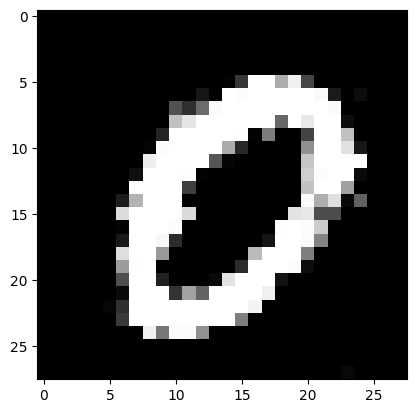

Is this digit identifiable? (n/digit): 0
Saved image and latent vector as Fake_Digits/0/095.png and Fake_Digits/0/095.txt.


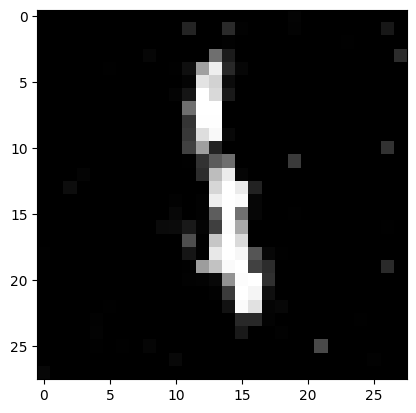

Is this digit identifiable? (n/digit): 1
Saved image and latent vector as Fake_Digits/1/096.png and Fake_Digits/1/096.txt.


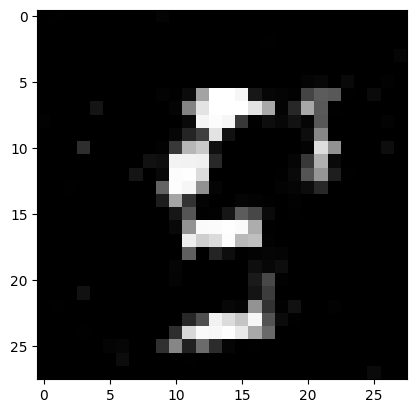

Is this digit identifiable? (n/digit): n
Image discarded.


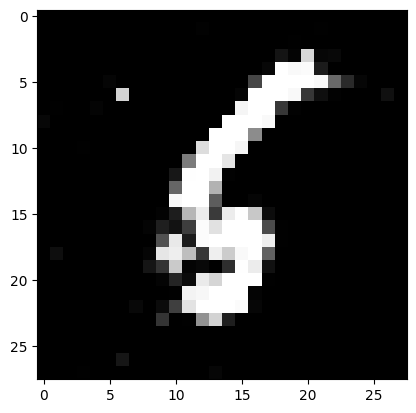

Is this digit identifiable? (n/digit): n
Image discarded.


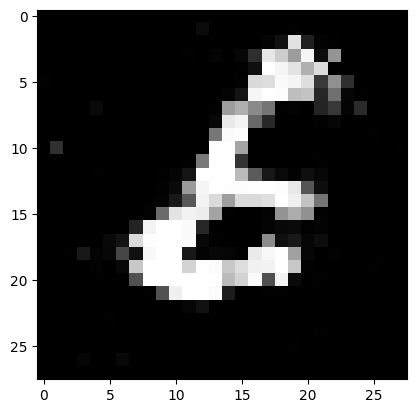

Is this digit identifiable? (n/digit): n
Image discarded.


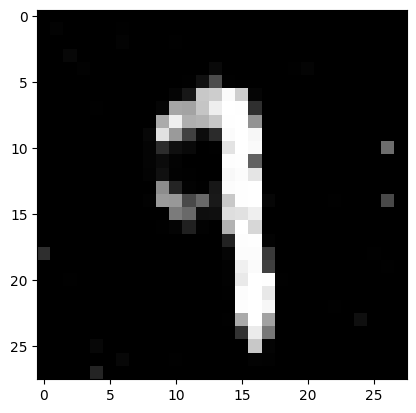

Is this digit identifiable? (n/digit): n
Image discarded.


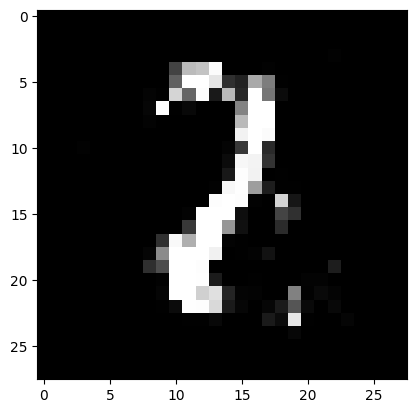

Is this digit identifiable? (n/digit): n
Image discarded.


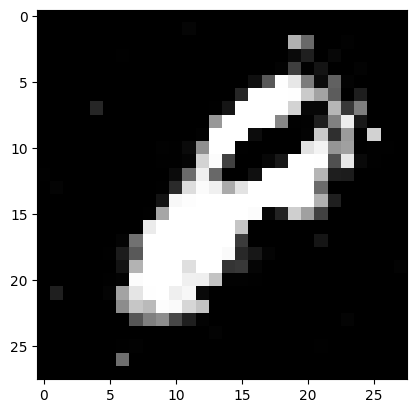

Is this digit identifiable? (n/digit): n
Image discarded.


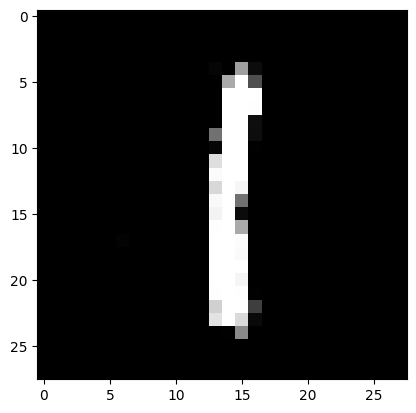

Is this digit identifiable? (n/digit): 1
Saved image and latent vector as Fake_Digits/1/097.png and Fake_Digits/1/097.txt.


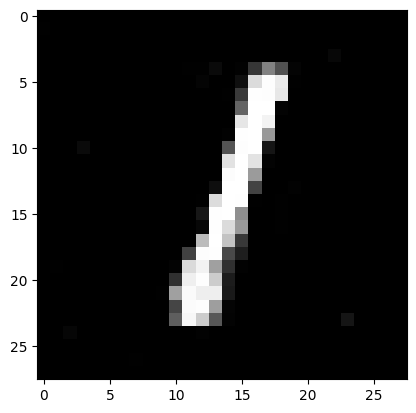

Is this digit identifiable? (n/digit): n
Image discarded.


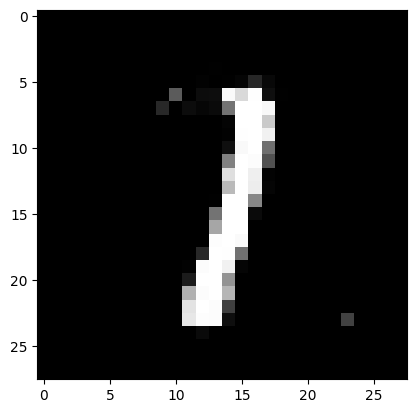

Is this digit identifiable? (n/digit): 1
Saved image and latent vector as Fake_Digits/1/098.png and Fake_Digits/1/098.txt.


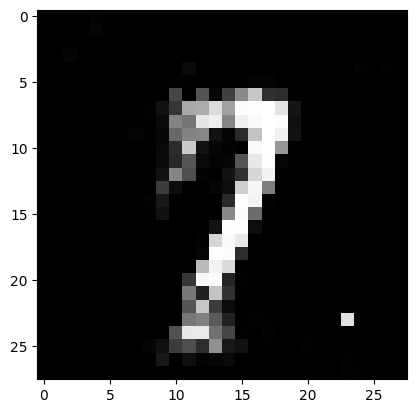

Is this digit identifiable? (n/digit): n
Image discarded.


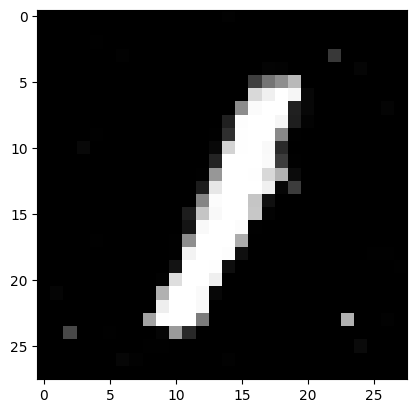

Is this digit identifiable? (n/digit): n
Image discarded.


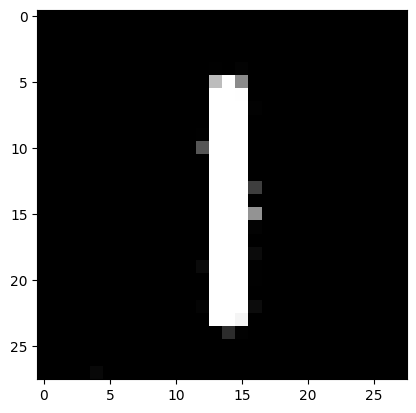

Is this digit identifiable? (n/digit): 1
Saved image and latent vector as Fake_Digits/1/099.png and Fake_Digits/1/099.txt.


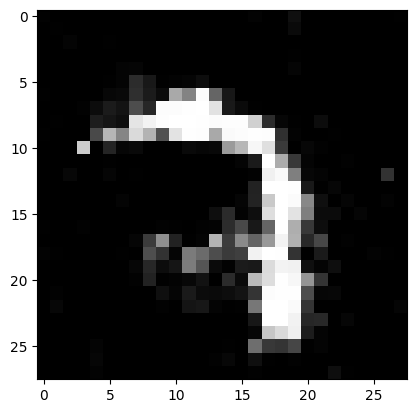

Is this digit identifiable? (n/digit): n
Image discarded.


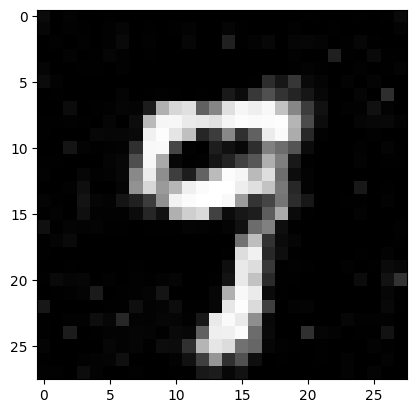

Is this digit identifiable? (n/digit): 9\
Invalid input. Please enter a valid integer or 'n' to discard the image.


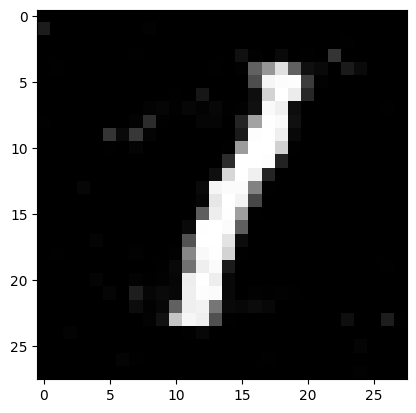

Is this digit identifiable? (n/digit): n
Image discarded.


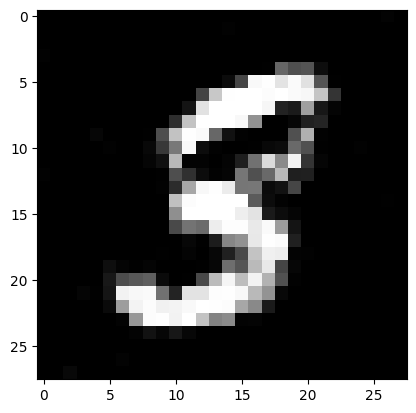

Is this digit identifiable? (n/digit): n
Image discarded.


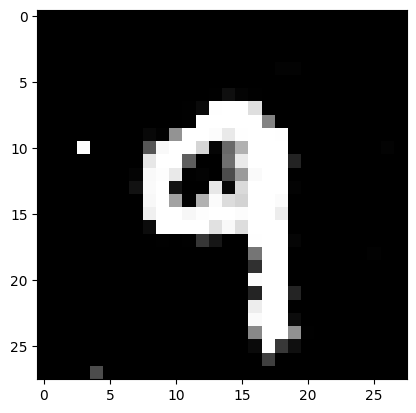

Is this digit identifiable? (n/digit): 9
Saved image and latent vector as Fake_Digits/9/100.png and Fake_Digits/9/100.txt.


In [ ]:
while generated_count < max_images:
    # Generate a random latent vector
    z = torch.randn(1, z_dim)

    # Generate a fake image using the generator
    fake_img = G(z)

    # Display the generated image
    plt.imshow(fake_img.squeeze().detach().cpu().numpy(), cmap='gray')
    plt.show()

    # Ask the user if the digit is identifiable and get the label
    response = input("Is this digit identifiable? (n/digit): ")

    if response.lower() == 'n':
        print("Image discarded.")
    else:
      try:
        label = int(response.strip())
      except ValueError:
        print("Invalid input. Please enter a valid integer or 'n' to discard the image.")
        continue
      else:
        generated_count += 1
        index = str(generated_count).zfill(3)  # Pad the index with zeros

        # Create the directory for this label if it doesn't exist
        label_dir = os.path.join(output_dir, str(label))
        os.makedirs(label_dir, exist_ok=True)

        # Save the image
        img_name = os.path.join(label_dir, f'{index}.png')
        save_image(fake_img, img_name, normalize=True)

        # Save the latent vector to a text file
        latent_vector = z.cpu().detach().numpy().flatten()
        txt_name = os.path.join(label_dir, f'{index}.txt')
        np.savetxt(txt_name, latent_vector)

        print(f"Saved image and latent vector as {img_name} and {txt_name}.")



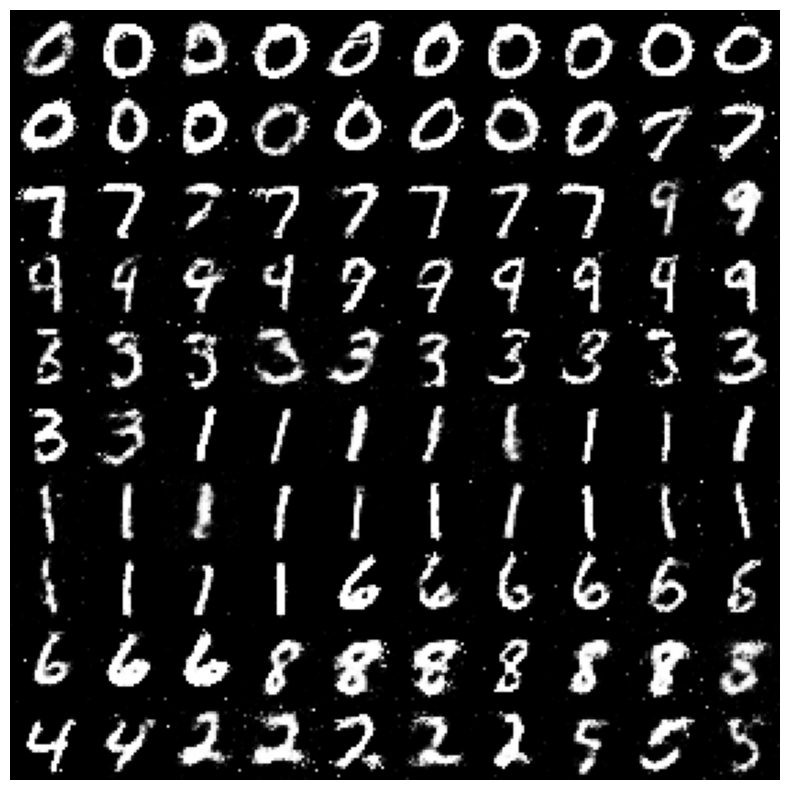

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to the folder containing the fake digit images
# folder_path = 'Fake_Digits'
folder_path = "/content/drive/MyDrive/Colab Notebooks/Semester_07/Advanced ML/Fake_Digits"

# Initialize an empty list to store images
images = []

# Load all images in the folder
for label in os.listdir(folder_path):
    label_path = os.path.join(folder_path, label)
    if os.path.isdir(label_path):
        for img_name in sorted(os.listdir(label_path)):
            if img_name.endswith('.png'):
                img_path = os.path.join(label_path, img_name)
                img = Image.open(img_path)
                images.append(img)

# Select the first 100 images
images = images[:100]

# Determine the size of each image
img_width, img_height = images[0].size

# Create a new blank image to hold the 10x10 grid
grid_image = Image.new('RGB', (10 * img_width, 10 * img_height))

# Paste each image into the grid
for i, img in enumerate(images):
    row = i // 10
    col = i % 10
    grid_image.paste(img, (col * img_width, row * img_height))

# Display the grid
plt.figure(figsize=(10, 10))
plt.imshow(grid_image)
plt.axis('off')  # Hide axes
plt.show()

# Save the grid image if needed
# grid_image.save('FakeDigits_Grid.png')
grid_image.save('/content/drive/MyDrive/Colab Notebooks/Semester_07/Advanced ML/FakeDigits_Grid.png')